In [1]:
!pip install pandas

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------- ----------------------------- 2.9/11.0 MB 15.3 MB/s eta 0:00:01
   ----------------- ---------------------- 4.7/11.0 MB 12.4 MB/s eta 0:00:01
   ------------------ --------------------- 5.0/11.0 MB 11.6 MB/s eta 0:00:01
   ------------------ --------------------- 5.0/11.0 MB 11.6 MB/s eta 0:00:01
   -------------------- ------------------- 5.8/11.0 MB 5.9 MB/s eta 0:00:01
   ------------------------- -------------- 7.1/11.0 MB 5.7 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.0 MB 5.8 MB/s eta 0:00:01
   ----------------------------------- ---- 9.7/11.0 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 5.7 MB/s  0:00:01
   ---------------------

In [1]:
import pandas as pd
df = pd.read_csv('../data/sample_car_contracts.csv')
df.head()

,id,customer_name,contract_type,vehicle_type,monthly_emi,interest_rate,tenure_months,clause_summary,risk_flag,issue_type,recommended_action
0,1,Rahul Mehta,Car Loan,Sedan,18500,9.5,48,Prepayment allowed only after 24 months with 5...,medium,High prepayment charges,Highlight prepayment penalty to user and sugge...
1,2,Anita Rao,Car Lease,SUV,22000,0.0,36,Lessee must pay for all maintenance and insurance,low,Standard maintenance clause,"No action, just explain maintenance responsibi..."
2,3,James Wilson,Car Loan,Hatchback,14500,11.2,60,Late payment fee of 3% per month on outstandin...,high,Aggressive late fee,Flag clause and suggest user request cap on la...
3,4,Meena Iyer,Car Lease,Sedan,21000,0.0,24,"Excess mileage charge of ₹12 per km over 15,00...",medium,High excess mileage rate,Warn user about extra mileage charges and reco...
4,5,Arjun Patel,Car Loan,SUV,27500,10.8,72,Floating interest rate linked to lender's inte...,high,Unclear interest benchmark,Explain floating rate risk and suggest asking ...


In [ ]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


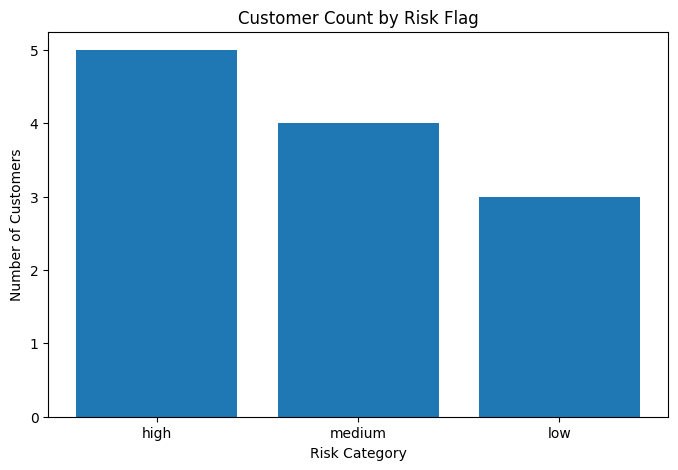

In [ ]:
import matplotlib.pyplot as plt
risk_counts = df['risk_flag'].value_counts()
plt.figure(figsize=(8,5))
plt.bar(risk_counts.index.astype(str), risk_counts.values)
plt.xlabel("Risk Category")
plt.ylabel("Number of Customers")
plt.title("Customer Count by Risk Flag")
plt.show()

In [ ]:
df['tenure_years']=df['tenure_months']/12
avg=df.groupby('risk_flag')['tenure_years'].mean()
print(avg)

df['total_amount']=df['monthly_emi']*df['tenure_months']

risk_flag
high      4.900000
low       2.833333
medium    3.500000
Name: tenure_years, dtype: float64


In [6]:
df.head()

,id,customer_name,contract_type,vehicle_type,monthly_emi,interest_rate,tenure_months,clause_summary,risk_flag,issue_type,recommended_action,tenure_years,total_amount
0,1,Rahul Mehta,Car Loan,Sedan,18500,9.5,48,Prepayment allowed only after 24 months with 5...,medium,High prepayment charges,Highlight prepayment penalty to user and sugge...,4.0,888000
1,2,Anita Rao,Car Lease,SUV,22000,0.0,36,Lessee must pay for all maintenance and insurance,low,Standard maintenance clause,"No action, just explain maintenance responsibi...",3.0,792000
2,3,James Wilson,Car Loan,Hatchback,14500,11.2,60,Late payment fee of 3% per month on outstandin...,high,Aggressive late fee,Flag clause and suggest user request cap on la...,5.0,870000
3,4,Meena Iyer,Car Lease,Sedan,21000,0.0,24,"Excess mileage charge of ₹12 per km over 15,00...",medium,High excess mileage rate,Warn user about extra mileage charges and reco...,2.0,504000
4,5,Arjun Patel,Car Loan,SUV,27500,10.8,72,Floating interest rate linked to lender's inte...,high,Unclear interest benchmark,Explain floating rate risk and suggest asking ...,6.0,1980000


In [7]:
avg=df.groupby('risk_flag')['total_amount'].mean()
print(avg)

risk_flag
high      1407000.0
low        683000.0
medium     812400.0
Name: total_amount, dtype: float64


In [8]:
avg=df.groupby('risk_flag')['monthly_emi'].mean()
print(avg)

risk_flag
high      22700.0
low       20000.0
medium    19550.0
Name: monthly_emi, dtype: float64


In [9]:
avg=df.groupby('risk_flag')['tenure_years'].mean()
print(avg)

risk_flag
high      4.900000
low       2.833333
medium    3.500000
Name: tenure_years, dtype: float64


In [ ]:
cross=pd.crosstab(df['risk_flag'],df['recommended_action'])
print(cross)

recommended_action  Explain condition for refund, low risk  \
risk_flag                                                    
high                                                     0   
low                                                      1   
medium                                                   0   

recommended_action  Explain floating rate risk and suggest asking for external benchmark or cap  \
risk_flag                                                                                         
high                                                                1                             
low                                                                 0                             
medium                                                              0                             

recommended_action  Flag as risky and suggest negotiating lower termination fee  \
risk_flag                                                                         
high                       

In [ ]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)  
    text = re.sub(r'\s+', ' ', text)        
    return text.strip()

df['clean_contract'] = df['clause_summary'].apply(clean_text)

df['contract_length'] = df['clean_contract'].apply(lambda x: len(x.split()))

In [4]:
def detect_hidden_charges(text):
    keywords = ["fee", "penalty", "late", "extra"]
    for word in keywords:
        if word in text:
            return 1   
    return 0            

df['hidden_charges_flag'] = df['clean_contract'].apply(detect_hidden_charges)

In [5]:
df.head()

,id,customer_name,contract_type,vehicle_type,monthly_emi,interest_rate,tenure_months,clause_summary,risk_flag,issue_type,recommended_action,clean_contract,contract_length,hidden_charges_flag
0,1,Rahul Mehta,Car Loan,Sedan,18500,9.5,48,Prepayment allowed only after 24 months with 5...,medium,High prepayment charges,Highlight prepayment penalty to user and sugge...,prepayment allowed only after 24 months with 5...,9,1
1,2,Anita Rao,Car Lease,SUV,22000,0.0,36,Lessee must pay for all maintenance and insurance,low,Standard maintenance clause,"No action, just explain maintenance responsibi...",lessee must pay for all maintenance and insurance,8,0
2,3,James Wilson,Car Loan,Hatchback,14500,11.2,60,Late payment fee of 3% per month on outstandin...,high,Aggressive late fee,Flag clause and suggest user request cap on la...,late payment fee of 3 per month on outstanding...,10,1
3,4,Meena Iyer,Car Lease,Sedan,21000,0.0,24,"Excess mileage charge of ₹12 per km over 15,00...",medium,High excess mileage rate,Warn user about extra mileage charges and reco...,excess mileage charge of 12 per km over 15000 ...,12,0
4,5,Arjun Patel,Car Loan,SUV,27500,10.8,72,Floating interest rate linked to lender's inte...,high,Unclear interest benchmark,Explain floating rate risk and suggest asking ...,floating interest rate linked to lenders inter...,8,0


In [7]:
from collections import Counter
high_risk_text=" ".join(df[df['risk_flag']=='high']['clean_contract'])

word_counts=Counter(high_risk_text.split())

common_words=["the", "and", "to", "of", "in", "for", "a", "is", "with"]
filtered_counts={w:c for w,c in word_counts.items() if w not in common_words}

top_keywords=sorted(filtered_counts.items(), key=lambda x: x[1], reverse=True)[:10]
top_keywords

[('fee', 2),
 ('late', 1),
 ('payment', 1),
 ('3', 1),
 ('per', 1),
 ('month', 1),
 ('on', 1),
 ('outstanding', 1),
 ('amount', 1),
 ('floating', 1)]

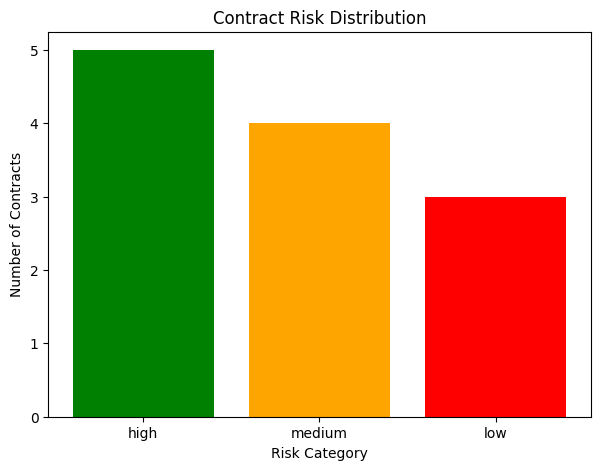

In [8]:
import matplotlib.pyplot as plt
risk_counts = df['risk_flag'].value_counts()
plt.figure(figsize=(7,5))
plt.bar(risk_counts.index, risk_counts.values, color=['green','orange','red'])
plt.xlabel("Risk Category")
plt.ylabel("Number of Contracts")
plt.title("Contract Risk Distribution")
plt.show()